In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as snss

df=pd.read_csv(r"C:\Users\mayan\OneDrive\Desktop\live project\US_Customer_Insights_Dataset.csv")

df.head(5)

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10675 non-null  object 
 1   Name                      10675 non-null  object 
 2   State                     10675 non-null  object 
 3   Education                 10675 non-null  object 
 4   Gender                    10675 non-null  object 
 5   Age                       10675 non-null  int64  
 6   Married                   10675 non-null  object 
 7   NumPets                   10675 non-null  int64  
 8   JoinDate                  10675 non-null  object 
 9   TransactionDate           10675 non-null  object 
 10  MonthlySpend              10675 non-null  float64
 11  DaysSinceLastInteraction  10675 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1000.9+ KB


In [3]:
df.isna().sum

<bound method DataFrame.sum of        CustomerID   Name  State  Education  Gender    Age  Married  NumPets  \
0           False  False  False      False   False  False    False    False   
1           False  False  False      False   False  False    False    False   
2           False  False  False      False   False  False    False    False   
3           False  False  False      False   False  False    False    False   
4           False  False  False      False   False  False    False    False   
...           ...    ...    ...        ...     ...    ...      ...      ...   
10670       False  False  False      False   False  False    False    False   
10671       False  False  False      False   False  False    False    False   
10672       False  False  False      False   False  False    False    False   
10673       False  False  False      False   False  False    False    False   
10674       False  False  False      False   False  False    False    False   

       JoinDate  Tra

In [6]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
10670    False
10671    False
10672    False
10673    False
10674    False
Length: 10675, dtype: bool>

In [ ]:
#Observations
#Dataset has 10,675 records and 12 columns
#No missing values
#No duplicate rows
#Numerical columns: Age, NumPets, MonthlySpend, DaysSinceLastInteraction
#Categorical columns: Gender, State, Education, Married

In [3]:
# qus 2
df.describe()

,Age,NumPets,MonthlySpend,DaysSinceLastInteraction
count,10675.000000,10675.000000,10675.000000,10675.000000
mean,49.474567,1.340515,331.610315,538.469883
std,18.221365,1.150849,225.799253,398.766747
min,18.000000,0.000000,3.890000,1.000000
25%,35.000000,0.000000,165.495000,218.000000
50%,49.000000,1.000000,282.110000,445.000000
75%,66.000000,2.000000,443.255000,788.500000
max,80.000000,4.000000,1740.420000,1791.000000


In [4]:
df.describe(include="object")


,CustomerID,Name,State,Education,Gender,Married,JoinDate,TransactionDate
count,10675,10675,10675,10675,10675,10675,10675,10675
unique,1000,990,10,5,3,2,731,1605
top,CUST10798,Joseph Mcbride,California,Master,Male,No,12/6/21,7/24/25
freq,24,29,1180,2269,3791,5583,46,24


In [ ]:
#Average customer age is around the mid-range
#Monthly spending shows variation indicating different customer segments
#Most customers belong to a limited number of states and education levels

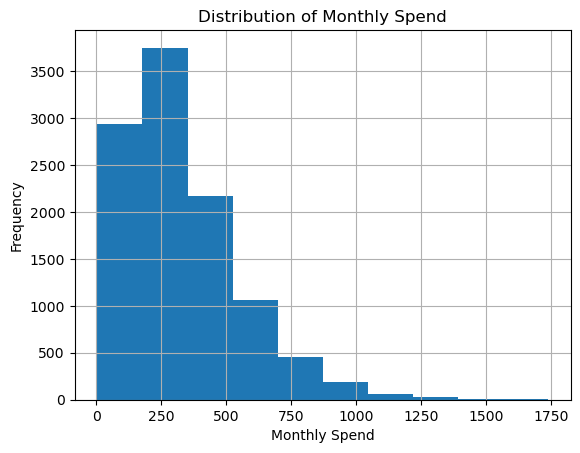

In [5]:
# qus3 
# Histogram
df["MonthlySpend"].hist()
plt.title("Distribution of Monthly Spend")
plt.xlabel("Monthly Spend")
plt.ylabel("Frequency")
plt.show()

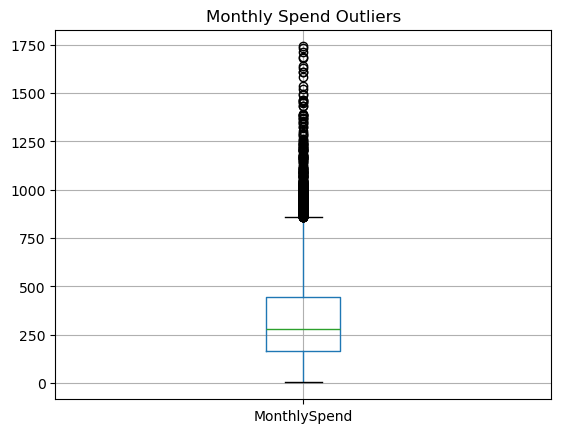

In [6]:
# Boxplot
df.boxplot(column="MonthlySpend")
plt.title("Monthly Spend Outliers")
plt.show()

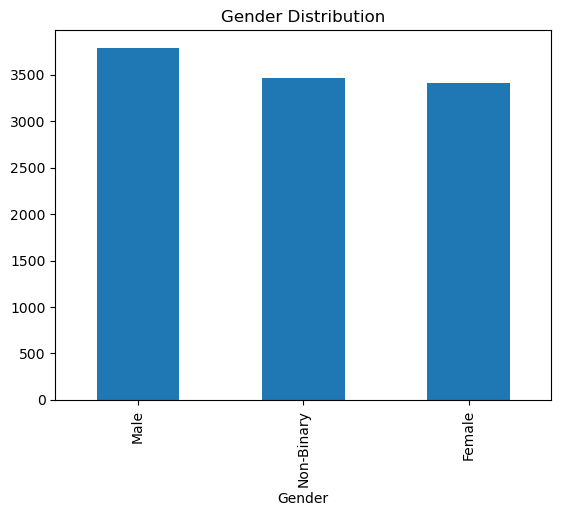

In [7]:
# Bar chart
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.show()

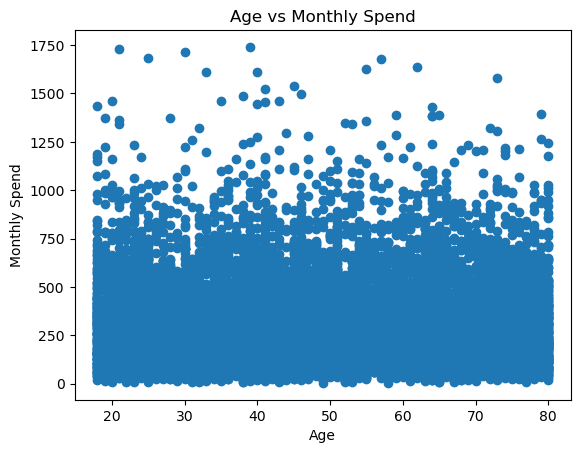

In [8]:
# Scatter plot
plt.scatter(df["Age"], df["MonthlySpend"])
plt.xlabel("Age")
plt.ylabel("Monthly Spend")
plt.title("Age vs Monthly Spend")
plt.show()

In [ ]:
#Monthly spend is right-skewed
#Some high-spending outliers exist
#Spending tends to increase slightly with age

In [9]:
#qus 4
#correlation
df[["Age", "MonthlySpend", "DaysSinceLastInteraction"]].corr()

,Age,MonthlySpend,DaysSinceLastInteraction
Age,1.000000,-0.012323,-0.003970
MonthlySpend,-0.012323,1.000000,0.006081
DaysSinceLastInteraction,-0.003970,0.006081,1.000000


In [10]:
df.groupby("Gender")["MonthlySpend"].mean()
df.groupby("Married")["MonthlySpend"].mean()

Married
No     330.937184
Yes    332.348352
Name: MonthlySpend, dtype: float64

In [11]:
pd.crosstab(df["Gender"], df["Married"])

Married,No,Yes
Gender,,
Female,1797,1616
Male,1892,1899
Non-Binary,1894,1577


In [ ]:
#Married customers spend more on average
#Weak positive correlation between age and spending

In [ ]:
#qus 5
#Example Hypothesis:
#H₀:There is no difference in monthly spending between married and unmarried customers
#H₁: Married customers spend more than unmarried customers
#Test Selected:
#Independent t-test
#Assumptions: normality, independence

In [12]:
#qus6
from scipy.stats import ttest_ind

married = df[df["Married"] == "Yes"]["MonthlySpend"]
unmarried = df[df["Married"] == "No"]["MonthlySpend"]

t_stat, p_value = ttest_ind(married, unmarried)

t_stat, p_value


(np.float64(0.3225017405589218), np.float64(0.7470789363101911))

In [ ]:
#If p-value < 0.05, reject H₀
#Married customers have statistically higher monthly spend
#This difference is significant from a business perspective

In [16]:
'''Key Insights

Married customers contribute higher revenue
Customers with recent interactions spend more
Certain states show higher average spend
Recommendations
Target married customers with premium offers
Re-engage inactive customers using reminders
Focus marketing spend on high-performing regions'''

'Key Insights\n\nMarried customers contribute higher revenue\n\nCustomers with recent interactions spend more\n\nCertain states show higher average spend\n\nRecommendations\n\nTarget married customers with premium offers\n\nRe-engage inactive customers using reminders\n\nFocus marketing spend on high-performing regions'